In [4]:
import pandas as pd
import glob



In [6]:
tweets = pd.read_csv('Twitter_May_Aug_2014_TerrorSecurity_resolved.txt',delimiter=' ',names=['time_stamp','entity_1','entity_2'])

In [27]:
tweets.head(5)

,time_stamp,entity_1,entity_2
0,05:02:2014:20:15:22,statusid_462321880817745921,userid_831528001
1,05:02:2014:20:15:22,statusid_462321880817745921,userid_11134252
2,05:02:2014:20:15:22,statusid_462321880817745921,userid_20733972
3,05:02:2014:20:15:22,statusid_462321880817745921,benghazi
4,05:02:2014:20:15:22,statusid_462321880817745921,gop_benghazi


In [67]:
#Need to tokenise the entities, as well as time_stamp to int. 
seconds_per_period = (60*60*24)/80

In [37]:
#might need to actually resample the timestamps. 80 time ticks a day. The dates are not equally sampled
ticks[0],ticks[-1]

('05:02:2014:20:15:22', '08:01:2014:04:19:58')

In [98]:
(tweets.time_stamp.max() - tweets.time_stamp.min())

Timedelta('90 days 08:04:36')

In [41]:
tweets.time_stamp = pd.to_datetime(tweets.time_stamp,format='%m:%d:%Y:%H:%M:%S')

In [76]:
#.time_stamp.dt.second

tweets['time_int'] = round(((tweets.time_stamp - tweets.time_stamp.min()).dt.total_seconds())/seconds_per_period).astype('int')

In [9]:
ticks = sorted(tweets.time_stamp.unique())

In [10]:
time_lookup = dict()
i=1
for t in ticks:
    time_lookup[t] = i
    i+=1

In [53]:
entities = dict()
ents = set(tweets['entity_1']).union(set(tweets['entity_2']))
i = 1
for e in ents:
    entities[e] = i
    i+=1

In [77]:
# now need to turn it into a format that midas likes:
# source dest time
# int,int,int

a =  tweets.entity_1.map(entities)
b =  tweets.entity_2.map(entities)
t =  tweets.time_int

In [60]:
tweets.time_int.nunique()

605

In [99]:
tweets.time_int.nunique()

5919

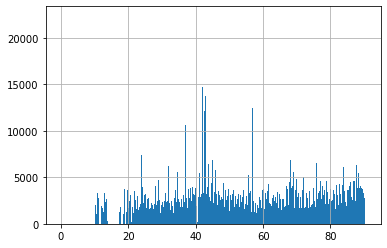

In [102]:
(tweets.time_int/80).hist(bins=1000)

In [112]:
outdf = pd.concat([a,b,t],axis=1)
outdf.sort_values('time_int').to_csv('tweet_processed.csv', index=False,header=False)

In [141]:
ground_truth = pd.read_excel('Ground Truth- 2009 & 2014.xlsx',sheet_name=1)

In [142]:
ground_truth

,"Date, Month",Event type,Entities,Event description,"Importance (High, Med,Low)"
0,2014-05-01 00:00:00,Bombing,"Abuja, Nigeria, The Islamist militant group Bo...","A car bomb exploded in New Nyanya, a suburb of...",Med
1,2014-05-13 00:00:00,"Turkey Mine Accident, Hundreds Dead.","Turkey, Soma, Istanbul ,Ankara, Prime Minister...",Some 284 miners are known to have died in the ...,High
2,2014-05-20 00:00:00,Bombing,"Jos, Nigeria, Boko Haram","Twin bombings, one at a market, the second 30 ...",High
3,2014-05-24 00:00:00,Raid,"Seiyun, Yemen, al Qaeda militants, Gulf Arab c...",people are killed in an overnight raid on Yeme...,High
4,2014-05-30 00:00:00,Attack/Ambush,"Suspected Séléka militants in Bangui, central ...","Notre-Dame de Fatima, a Catholic church, with ...",Mid
5,2014-06-03 00:00:00,Suicide bombing,"Rmadi, Iraq",A suicide bomber detonated his explosives next...,High
6,2014-06-05 00:00:00,Attack,"Shabwah Governorate, Yemen. A group of suspect...","attack a military checkpoint, killing 8 soldie...",High
7,2014-06-06 00:00:00,Bombing/Political Assassination,Suspected militants of the Karbi People's Libe...,ambush and kill a superintendent police chief ...,Low
8,2014-06-09 00:00:00,Suicide/Truck bombings,"Tuz Khormatoo, Iraq",A suicide truck bomber detonated his vehicle a...,Mid
9,2014-06-10 00:00:00,Iraqi Militants Seized Large Regions.,"Iraq, Kurdish region, Irbil, Tilkaif, Bartella...",Iraqi Militants,High


In [143]:
gt = ground_truth.drop(15)

In [144]:
gt['Date, Month'] = pd.to_datetime(gt['Date, Month'])

In [145]:
gt.columns

Index(['Date, Month', 'Event type', 'Entities', 'Event description',
       'Importance (High, Med,Low)'],
      dtype='object')

In [149]:
%matplotlib inline
gt[['Date, Month','Event type']]


,"Date, Month",Event type
0,2014-05-01,Bombing
1,2014-05-13,"Turkey Mine Accident, Hundreds Dead."
2,2014-05-20,Bombing
3,2014-05-24,Raid
4,2014-05-30,Attack/Ambush
5,2014-06-03,Suicide bombing
6,2014-06-05,Attack
7,2014-06-06,Bombing/Political Assassination
8,2014-06-09,Suicide/Truck bombings
9,2014-06-10,Iraqi Militants Seized Large Regions.


In [11]:
inv_time_lookup = {v: k for k, v in time_lookup.items()}

In [347]:
# process the file with midas

# trying with these settings:
# ./midas -i ./tweet_processed.csv -o timeline_score.txt -b 2719 -a 0.5 --norelations


import os
import subprocess

os.system('./midas -i ./tweet_processed.csv -o timeline_score.txt -b 2719 -a 0.5  --norelations --undirected')

#os.system('./midas -i ./tweet_processed.csv -o timeline_score.txt -b 1500 -a 0.6')


11

In [1]:
import numpy as np
list(np.round(np.linspace(0.1,1.1,11),2))

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]

In [210]:
# process the file with midas

# trying with these settings:
# ./midas -i ./tweet_processed.csv -o timeline_score.txt -b 2719 -a 0.5 --norelations


import os
import subprocess

for alpha in np.round(np.linspace(0.1,1.1,11),2):
    for bucketsize in range(500,3500,500):
        name = str(bucketsize)+'_'+str(alpha)
        print(name)
        os.system('./midas -i ./tweet_processed.csv -o ./processed/timeline_score_%s.txt -b %i -a %f --norelations'%(name,bucketsize,alpha))



500_0.1
1000_0.1
1500_0.1
2000_0.1
2500_0.1
3000_0.1
500_0.2
1000_0.2
1500_0.2
2000_0.2
2500_0.2
3000_0.2
500_0.3
1000_0.3
1500_0.3
2000_0.3
2500_0.3
3000_0.3
500_0.4
1000_0.4
1500_0.4
2000_0.4
2500_0.4
3000_0.4
500_0.5
1000_0.5
1500_0.5
2000_0.5
2500_0.5
3000_0.5
500_0.6
1000_0.6
1500_0.6
2000_0.6
2500_0.6
3000_0.6
500_0.7
1000_0.7
1500_0.7
2000_0.7
2500_0.7
3000_0.7
500_0.8
1000_0.8
1500_0.8
2000_0.8
2500_0.8
3000_0.8
500_0.9
1000_0.9
1500_0.9
2000_0.9
2500_0.9
3000_0.9
500_1.0
1000_1.0
1500_1.0
2000_1.0
2500_1.0
3000_1.0
500_1.1
1000_1.1
1500_1.1
2000_1.1
2500_1.1
3000_1.1


In [238]:
from tqdm import tqdm
#import progressbar

/Users/mattpang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


10.363005036671336

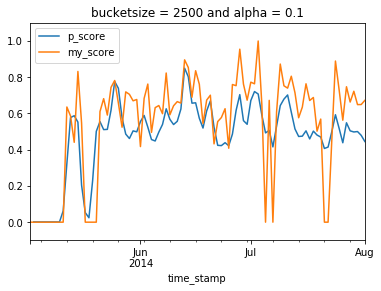

In [349]:
def process(file,show_plot=False):
    timelist_score =  pd.read_csv(file,names=['score'])
    tweets['score'] = timelist_score
    score = tweets.groupby(pd.Grouper(key='time_stamp',freq='d'))['score'].max()#.plot()
    
    new_score = score.reset_index()
    new_score['days_int'] = (new_score.time_stamp - pd.to_datetime('2014-05-02')).dt.days
    pub_score_merged = new_score.merge(pub_results,left_on='days_int',right_index=True, how='left')
    
    sscore = pub_score_merged.score
    tmp = (sscore-sscore.median())
    pub_score_merged['norm_score'] = tmp/tmp.max()
    pub_score_merged['my_score'] =  np.log(sscore-sscore.median()/5)/np.max(np.log(sscore))



    if show_plot:
        #fig = plt.figure()
        ax = pub_score_merged.plot('time_stamp','p_score')
        params = 'bucketsize = ' +' and alpha = '.join(file.split('/')[-1].replace('timeline_score_','').replace('.txt','').split('_'))
        #pub_score_merged.plot('time_stamp','norm_score',ax=ax,title=params)
        ax.set_ylim((-0.1,1.1))
        pub_score_merged.fillna(0).plot('time_stamp','my_score',ax=ax,title=params)

        
    no_nans = pub_score_merged.dropna()
    metric = np.sum(np.abs((no_nans['p_score'] - no_nans['my_score'])))
    return metric

process(files[0],show_plot=True)

/Users/mattpang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Users/mattpang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


8.273336671104303

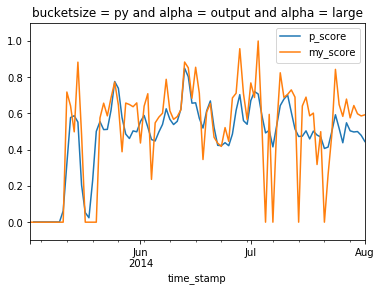

In [350]:

process('../pymidas/py_output_large.txt',show_plot=True)

In [322]:
sscore.median()/2

13355.102373

In [310]:
len(((np.log(np.sum(np.hsplit(timelist_score.score.values[:-74],92,),axis=1))-14)/8))

92

In [263]:
import matplotlib.pyplot as plt

array([         nan,          nan,          nan, ...,    89.591975,
       17354.869396, 18450.930214])

In [285]:
len(timelist_score.score.values)%91

53

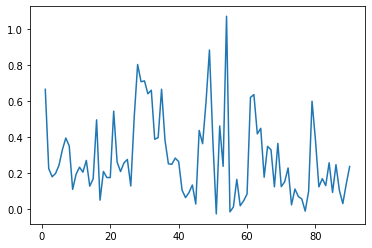

In [292]:
plt.show()

/Users/mattpang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


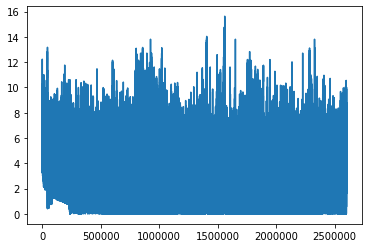

In [265]:
plt.plot(abs(np.log(timelist_score)))

In [246]:
#now do a sweep and calc the RMS of the norm score and published results. 

files = glob.glob('./processed/*.txt')

paper_results = pd.read_csv('extract_midas_2.csv',names=['time','p_score'])
paper_results['t_round'] = round(paper_results['time'])
pub_results = -paper_results.p_score.min() + paper_results.groupby('t_round').mean()['p_score']

metric_scores =dict()

for file in tqdm(files):
    #process(file)
    timelist_score =  pd.read_csv(file,names=['score'])
    tweets['score'] = timelist_score
    score = tweets.groupby(pd.Grouper(key='time_stamp',freq='d'))['score'].max()#.plot()
    
    new_score = score.reset_index()
    new_score['days_int'] = (new_score.time_stamp - pd.to_datetime('2014-05-02')).dt.days
    pub_score_merged = new_score.merge(pub_results,left_on='days_int',right_index=True, how='left')
    
    sscore = pub_score_merged.score
    tmp = (sscore-sscore.median())
    pub_score_merged['norm_score'] = tmp/tmp.max()
    #ax = pub_score_merged.plot('time_stamp','p_score')
    #params = 'bucketsize = ' +' and alpha = '.join(file.split('/')[-1].replace('timeline_score_','').replace('.txt','').split('_'))
    #pub_score_merged.plot('time_stamp','norm_score',ax=ax,title=params)
    #ax.set_ylim((-0.1,1.1))
    
    no_nans = pub_score_merged.dropna()
    metric = np.sum(np.abs((no_nans['score'] - no_nans['norm_score'])))

    metric_scores[file] = metric
    
    
    

100%|██████████| 54/54 [00:44<00:00,  1.22it/s]


In [342]:
#now do a sweep and calc the RMS of the norm score and published results. 

files = glob.glob('./processed/*.txt')

paper_results = pd.read_csv('extract_midas.csv',names=['time','p_score'])
paper_results['t_round'] = round(paper_results['time'])
pub_results = -paper_results.p_score.min() + paper_results.groupby('t_round').mean()['p_score']

metric_scores =dict()

for file in tqdm(files):
    metric = process(file)
    metric_scores[file] = metric
    
    
    

  0%|          | 0/54 [00:00<?, ?it/s]/Users/mattpang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
100%|██████████| 54/54 [00:45<00:00,  1.20it/s]


In [343]:
best_fit = pd.Series(metric_scores).nsmallest(1)
best_fit

./processed/timeline_score_500_0.9.txt    8.026979
dtype: float64

/Users/mattpang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


8.026978501733646

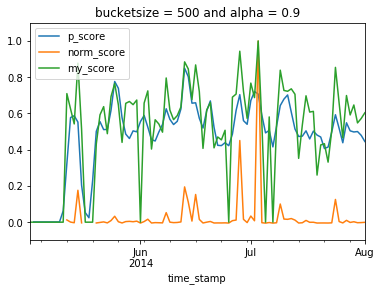

In [344]:
process(best_fit.index[0],show_plot=True)

/Users/mattpang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


10.682180208802857

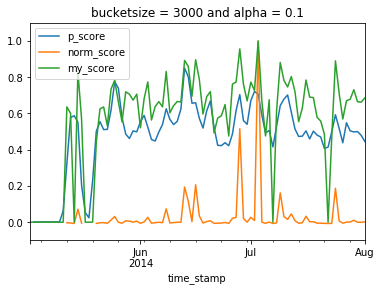

In [345]:
worst_fit = pd.Series(metric_scores).nlargest(1)
process(worst_fit.index[0],show_plot=True)

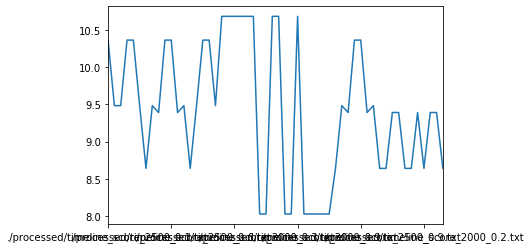

In [346]:
pd.Series(metric_scores).plot()

In [236]:
no_nans = pub_score_merged.dropna()
metric = np.sum(np.abs((no_nans['score'] - no_nans['norm_score'])))
metric

10195559.282313513

In [229]:
sum(np.sqrt((pub_score_merged['p_score'] - pub_score_merged['norm_score'])**2))

nan

In [225]:
'bucketsize = ' +' and alpha = '.join(file.split('/')[-1].replace('timeline_score_','').replace('.txt','').split('_'))

'bucketsize = 2500 and alpha = 0.1'

In [114]:
timelist_score = pd.read_csv('./timeline_score.txt',names=['score'])

In [105]:
timelist_score.head()

,score
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [117]:
len(tweets),len(timelist_score)

(2601834, 2601834)

In [119]:
tweets['score'] = timelist_score

In [134]:
score = tweets.groupby(pd.Grouper(key='time_stamp',freq='d'))['score'].max()#.plot()

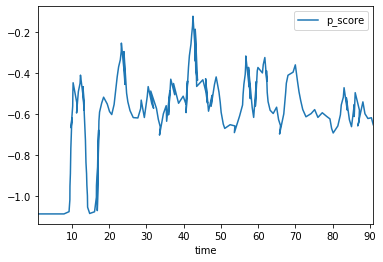

In [144]:
paper_results = pd.read_csv('extract_midas_2.csv',names=['time','p_score'])
paper_results['t_round'] = round(paper_results['time'])
paper_results.plot('time','p_score')

In [203]:
pub_results = -paper_results.p_score.min() + paper_results.groupby('t_round').mean()['p_score']

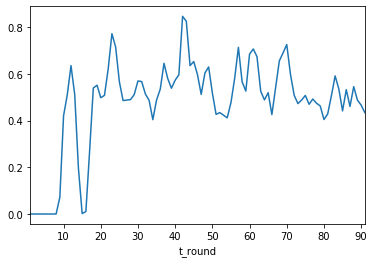

In [204]:
pub_results.plot()

In [205]:
new_score = score.reset_index()
new_score['days_int'] = (new_score.time_stamp - pd.to_datetime('2014-05-02')).dt.days
pub_score_merged = new_score.merge(pub_results,left_on='days_int',right_index=True, how='left')

In [206]:
sscore = pub_score_merged.score
tmp = (sscore-sscore.median())
pub_score_merged['norm_score'] = tmp/tmp.max()

In [207]:
sscore.median()

12.0231505

(-0.1, 1.1)

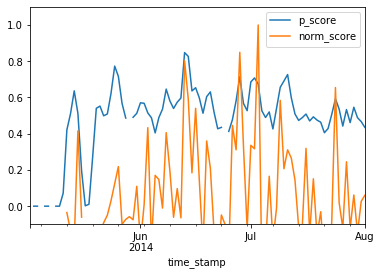

In [209]:
ax = pub_score_merged.plot('time_stamp','p_score')
pub_score_merged.plot('time_stamp','norm_score',ax=ax)
ax.set_ylim((-0.1,1.1))

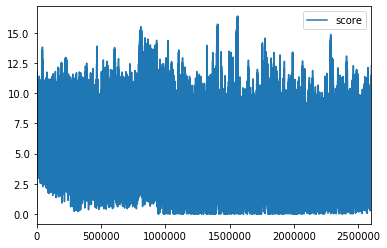

In [115]:
timelist_score.plot()

In [93]:
len(timelist_score.score)
#np.hsplit(timelist_score,80)#.max(axis=0)

2601834

In [108]:
len(timelist_score.score)/80

32522.925

In [12]:
# get files
files = glob.glob('./processed/*.txt')
timelist_score =  pd.read_csv(files[0],names=['score'])

#timelist_score = pd.read_csv('./timeline_score.txt',names=['score'])

In [84]:
anom_scores = timelist_score.reset_index()
anom_scores.columns = ['time_stamp','score']

In [86]:
anom_scores = anom_scores.fillna(0)

In [16]:
#05:02:2014:20:15:22
#anom_scores['time_stamp_dt'] = pd.to_datetime(anom_scores.time_stamp,format='%m:%d:%Y:%H:%M:%S')

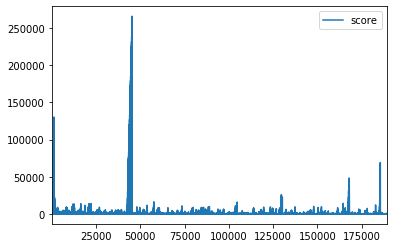

In [87]:
anom_scores.plot()

In [18]:
%matplotlib inline

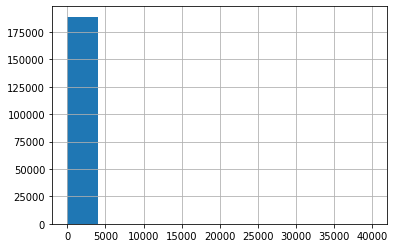

In [19]:
anom_scores.score.hist()

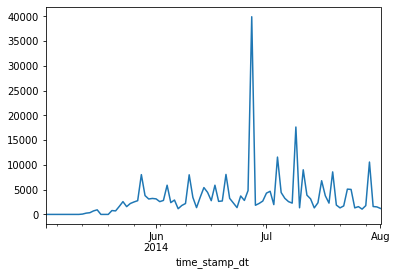

In [22]:
ascore = anom_scores.groupby(pd.Grouper(key='time_stamp_dt',freq='d'))['score'].max().fillna(0).plot()


In [33]:
ticks[0],ticks[-1]

('05:02:2014:20:15:22', '08:01:2014:04:19:58')

In [23]:
np.partition(timelist_score,4)

,score
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


from the paper

https://www.comp.nus.edu.sg/~sbhatia/assets/pdf/midas.pdf

1. 13-05-2014.TurkeyMineAccident,HundredsDead
2. 24-05-2014.Raid.
3. 30-05-2014.Attack/Ambush. 03-06-14. Suicide bombing
4. 09-06-14.Suicide/Truckbombings.
5. 10-06-2014.IraqiMilitantsSeizedLargeRegions. 11-06-2014. Kidnapping
6. 15-06-14.Attack
7. 26-06-14.SuicideBombing/Shootout/Raid
8. 03-07-14.IsraelConflictswithHamasinGaza.
9. 18-07-14. Airplane with 298 Onboard was Shot Down over Ukraine.
10. 30-07-14.EbolaVirusOutbreak.

In [213]:
paper_dates = ['2014-05-13','2014-05-24','2014-05-30','2014-06-09','2014-06-10','2014-06-15','2014-06-26','2014-07-03','2014-07-18','2014-07-30']



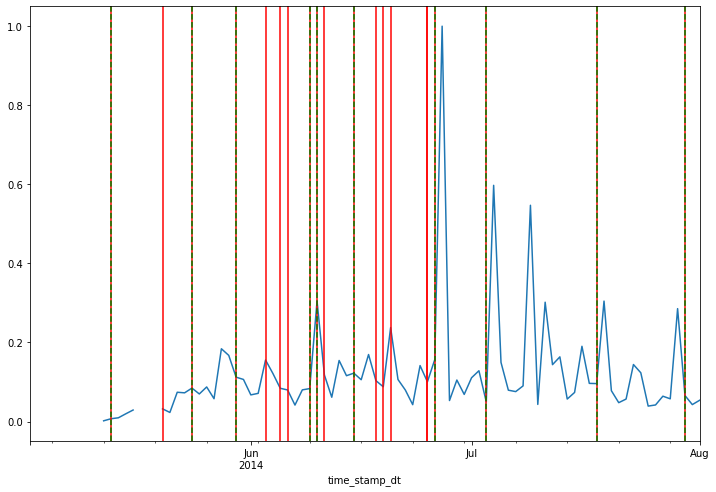

In [214]:
ascore = anom_scores.groupby(pd.Grouper(key='time_stamp_dt',freq='d'))['score'].max()#.fillna(0)

ax = (ascore/max(ascore)).plot(figsize=(12,8))
for o,event in gt[['Date, Month','Event type']].iterrows():
    ax.axvline(event['Date, Month'],c='r')
    
for p in paper_dates:
    ax.axvline(p,c='g',ls='--')

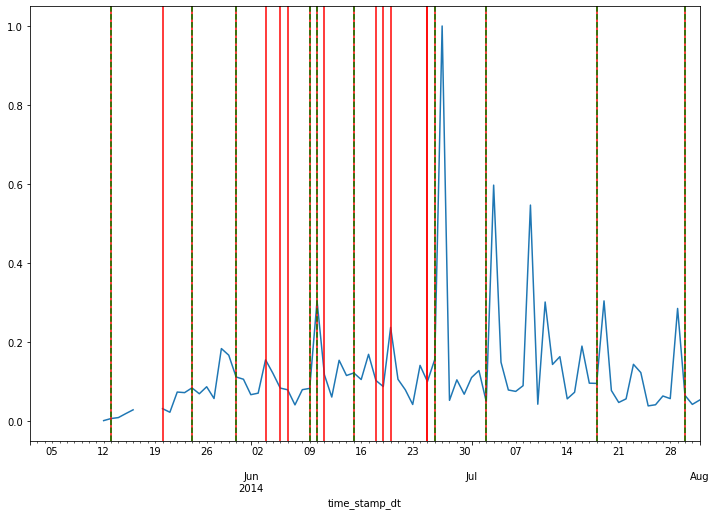

In [222]:
ascore = anom_scores.groupby(pd.Grouper(key='time_stamp_dt',freq='24h'))['score'].max()#.fillna(0)

ax = (ascore/max(ascore)).plot(figsize=(12,8))
for o,event in gt[['Date, Month','Event type']].iterrows():
    ax.axvline(event['Date, Month'],c='r')
    
for p in paper_dates:
    ax.axvline(p,c='g',ls='--')

In [138]:
for o,event in gt[['Date, Month','Event happened in Year 2009']].iterrows():
    print(event['Date, Month'])

2009-05-12 00:00:00
2009-05-24 00:00:00
2009-05-24 00:00:00
2009-05-22 00:00:00
2009-06-01 00:00:00
2009-06-12 00:00:00
2009-06-28 00:00:00
2009-06-29 00:00:00
2009-07-04 00:00:00
2009-07-05 00:00:00
2009-07-15 00:00:00
2009-08-11 00:00:00
2009-08-19 00:00:00
2009-08-23 00:00:00
2009-08-28 00:00:00
2009-09-04 00:00:00
2009-09-18 00:00:00
2009-10-10 00:00:00
2009-10-18 00:00:00
2009-10-25 00:00:00
2009-10-28 00:00:00
2009-11-05 00:00:00
2009-11-20 00:00:00
2009-11-29 00:00:00
2009-12-01 00:00:00
2009-12-08 00:00:00
2009-12-25 00:00:00


In [138]:
for o,event in gt[['Date, Month','Event happened in Year 2009']].iterrows():
    print(event['Date, Month'])

2009-05-12 00:00:00
2009-05-24 00:00:00
2009-05-24 00:00:00
2009-05-22 00:00:00
2009-06-01 00:00:00
2009-06-12 00:00:00
2009-06-28 00:00:00
2009-06-29 00:00:00
2009-07-04 00:00:00
2009-07-05 00:00:00
2009-07-15 00:00:00
2009-08-11 00:00:00
2009-08-19 00:00:00
2009-08-23 00:00:00
2009-08-28 00:00:00
2009-09-04 00:00:00
2009-09-18 00:00:00
2009-10-10 00:00:00
2009-10-18 00:00:00
2009-10-25 00:00:00
2009-10-28 00:00:00
2009-11-05 00:00:00
2009-11-20 00:00:00
2009-11-29 00:00:00
2009-12-01 00:00:00
2009-12-08 00:00:00
2009-12-25 00:00:00


In [140]:
gt[['Date, Month','Event happened in Year 2009']]

,"Date, Month",Event happened in Year 2009
0,2009-05-12,Middle East And North Africa Unrest
1,2009-05-24,Pakistan Troops Fight Taliban in the Swat Valley.
2,2009-05-24,North Korea conducts nuclear test.
3,2009-05-22,Sri Lanka Tamil Tigers Defeated.
4,2009-06-01,"Air France Flight 447 Missing, 228 on Board Dead."
5,2009-06-12,"Iran Presidential Election, Ahmadinejad Reelec..."
6,2009-06-28,"Honduras Army Coup, President on Exile."
7,2009-06-29,"Yemen Airliner Crashes in Comoros, 150 Died."
8,2009-07-04,North Korea Rocket Launch.
9,2009-07-05,China Xinjiang Uighur Region Riot.


In [262]:
sedansample = pd.read_csv('./sedanspot_input.csv',names=['time','source','dest','weight','tag'])
sedansample.head()

,time,source,dest,weight,tag
0,0,172.016.112.020,192.168.001.010,1,-
1,0,172.016.112.020,192.168.001.010,1,-
2,6,192.168.001.005,192.168.001.001,1,-
3,6,192.168.001.005,192.168.001.001,1,-
4,7,192.168.001.010,172.016.112.020,1,-


In [263]:
sentities = dict()
ents = set(sedansample['source']).union(set(sedansample['dest']))
i = 1
for e in ents:
    sentities[e] = i
    i+=1

In [264]:
sedansample.source = sedansample.source.map(sentities)
sedansample.dest = sedansample.dest.map(sentities)

In [265]:
sedansample[['time','source','dest']].to_csv('./sedan_processed.csv',header=False,index=False)

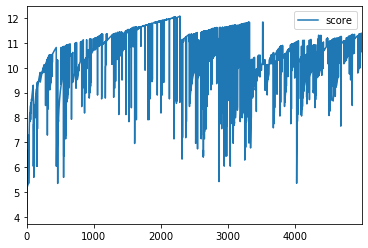

In [266]:
sedanscores = pd.read_csv('sedan_timeline_score.txt',names=['score'])
sedanscores.plot()

In [267]:
sedansample.tag.unique()

array(['-', 'format_clear', 'ffb_clear'], dtype=object)

In [268]:
sedansample[sedansample.tag != '-']

,time,source,dest,weight,tag
18,10,109,146,1,format_clear
41,12,109,146,1,ffb_clear


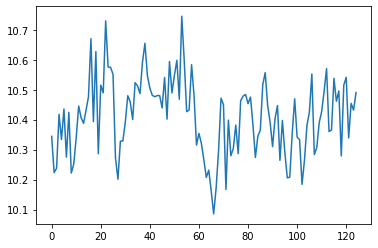

In [269]:
import numpy as np
import matplotlib.pyplot as plt
parts = 40
plt.plot(np.reshape(sedanscores.score.values,(parts,int(5000/parts))).mean(axis=0))
